<h1>ECE-GY 9293 HW1 Guandong Kou (gk1675)</h1>

In [1]:
run ../styles.ipynb

In [2]:
run HW1_Encapsulation.ipynb

## Problem 1 (10.2 Newman)

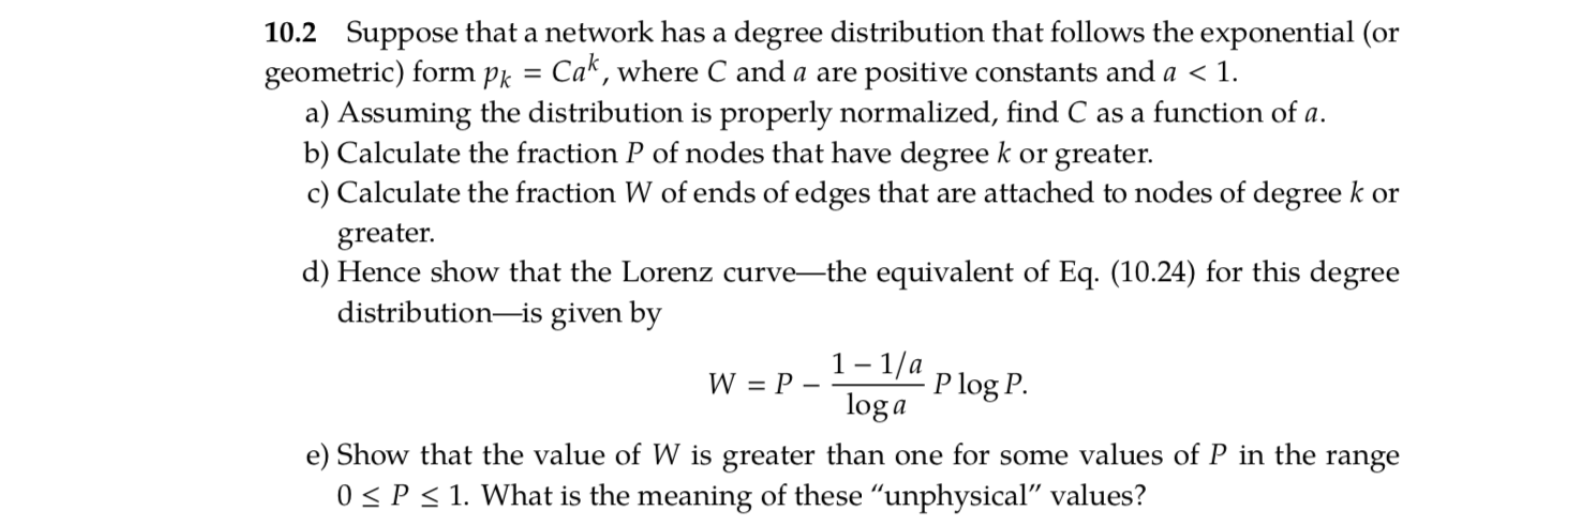

Assume $k_{min}=0$, i.e. all nodes in the network have degree at least 0.

### 1(a)

Using normalization,
$$
\sum_{k=0}^{\infty}p_k = \sum_{k=0}^{\infty}C a^k = C\frac{(1-a^{\infty})}{1-a}=\frac{C}{1-a}=1 \\
\Rightarrow C = 1-a
$$

### 1(b)

$$
P = \sum_{i=k}^{\infty}p_i  = \sum_{i=k}^{\infty} C a^i = C\frac{a^k - a^{\infty}}{1-a} = a^{k}
$$

### 1(c)

At the tail of the geometric distribution, the discrete model can be approximated with a continuous distribution.
$$
W = \sum_{j=k}^{\infty} j p_j =\sum_{j=k}^{\infty} j Ca^j 
\approx C\int_{x=k}^{\infty} xa^x dx 
= C \text{ln}a \int_{x=k}^{\infty} xda^x 
= C \text{ln}a [xa^x - \int_{x=k}^{\infty} a^x dx ] \\
= C \text{ln}a [xa^x - \frac{a^x}{ln\ a}] \bigg\vert_{x=k}^{\infty}
= C(1-k\text{ln}a )a^k 
= (1-a)(1-k\text{ln}a )a^{k-1}
$$

### 1(d)

Combining the conclusion from (a), (b) and (c), i.e. 
$$
\begin{cases}
P = a^{k-1} \\
W = (1-a)(1-k\text{ln}a )a^{k-1}
\end{cases}
\Rightarrow k = 1 + log_a P
$$
the relation between W and P can be represented as:
$$
\Rightarrow W = P - \frac{a-1}{a\text{log}a}P\text{log}P
$$

### 1(e)

In [3]:
p1 = Problem1()

In [4]:
interact(
    p1.plot_W,
    a = widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.1, continuous_update=False)
);

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='a', max=0.99, min=0.01, ste…

W becomes larger than 1 only when p is relatively large, and after reaching the maximum value, W starts to decrease with P and finally become 1 at P=1. When a is relatively small, the discrete model cannot be approximated with the continuous model. The smaller the value of a, the more obvious the deviation of the two models.

---
## Problem 2 (10.3 Newman)

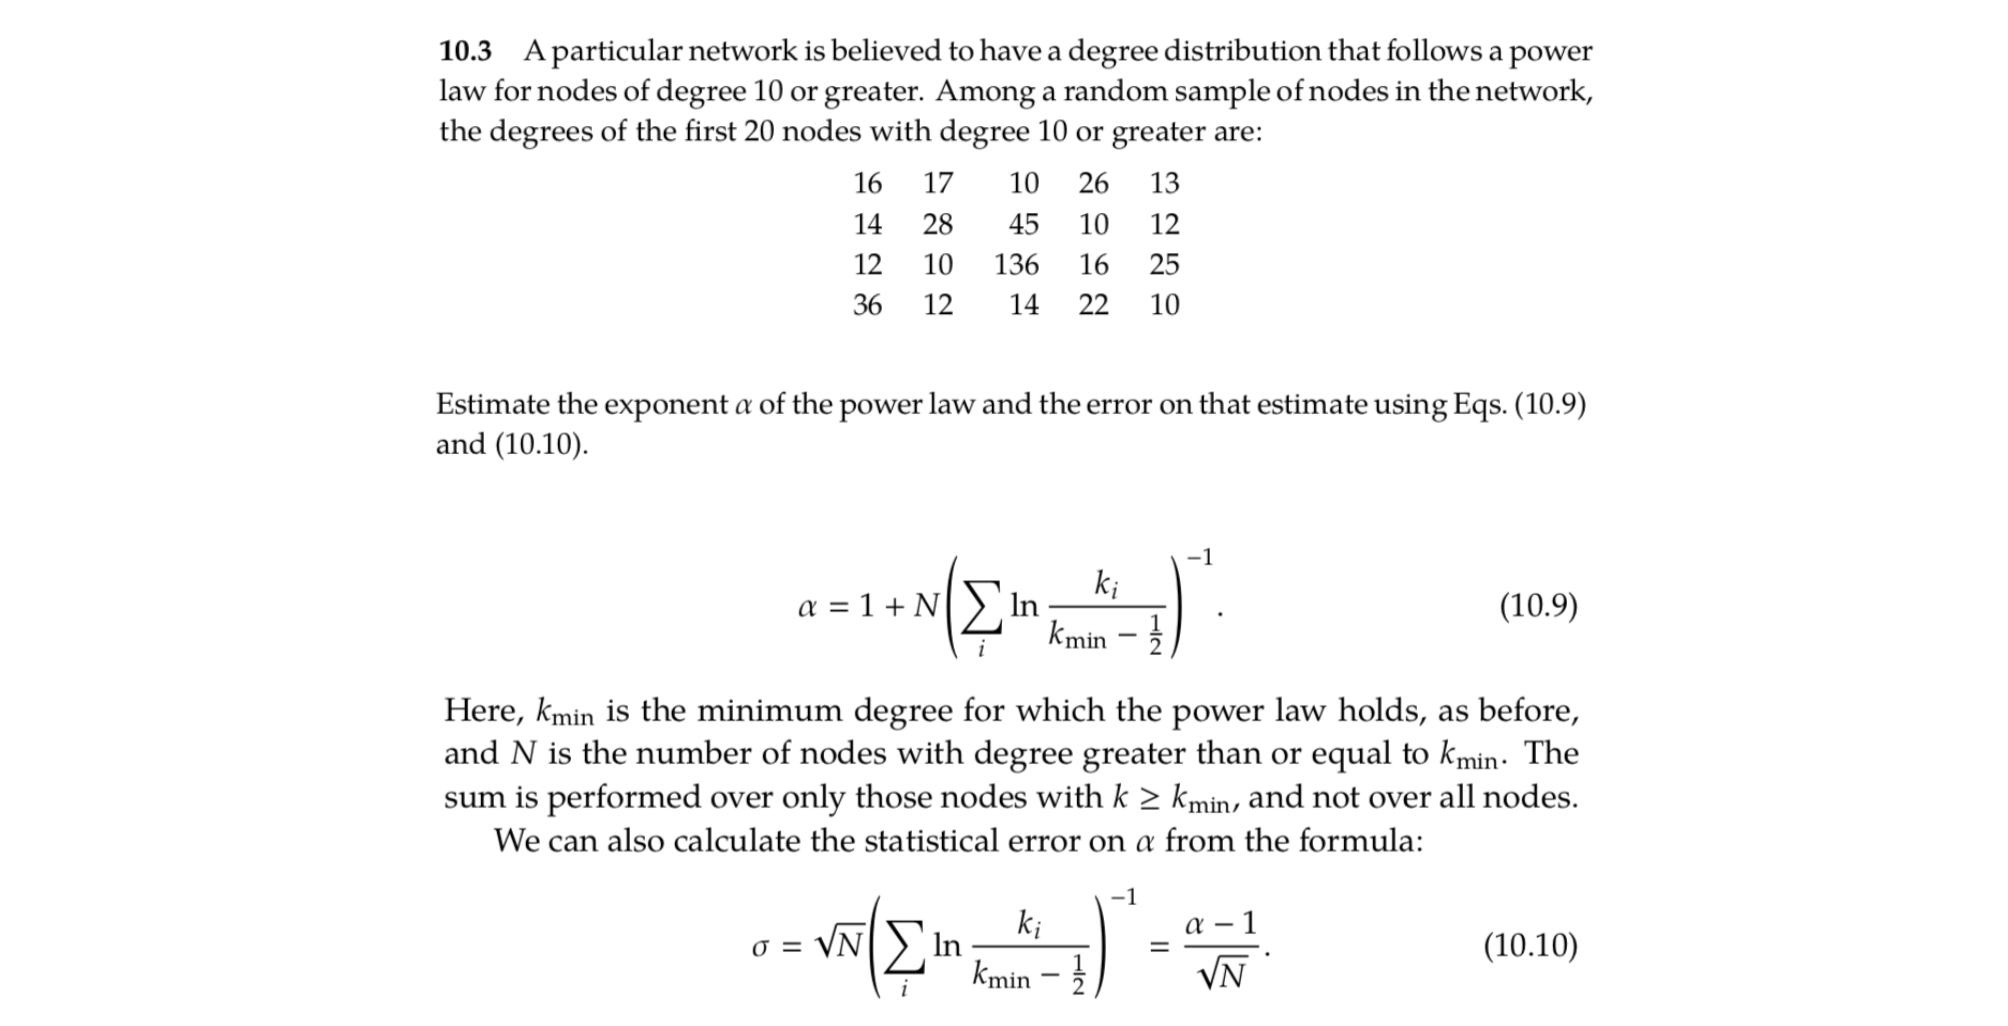

In [5]:
class Problem2():
    def __init__(self):
        self.degrees = np.array([16, 17, 10, 26, 13, 14, 28, 45, 10, 12, 12, 10, 136, 16, 25, 36, 12, 14, 22, 10]) 
    def getParams(self):
        N = len(self.degrees)
        k_min = 10 # should be equal to min(degrees), according to the description
        alpha = 1 + N / (np.sum(np.log(self.degrees/(k_min - 1/2))))
        err = (alpha  - 1) / np.sqrt(N)
        return alpha, err

In [6]:
print('alpha: %.4f, error: %.4f' %Problem2().getParams()) # alpha and error

alpha: 2.5310, error: 0.3423


---
## Problem 3 (7.3 Newman)

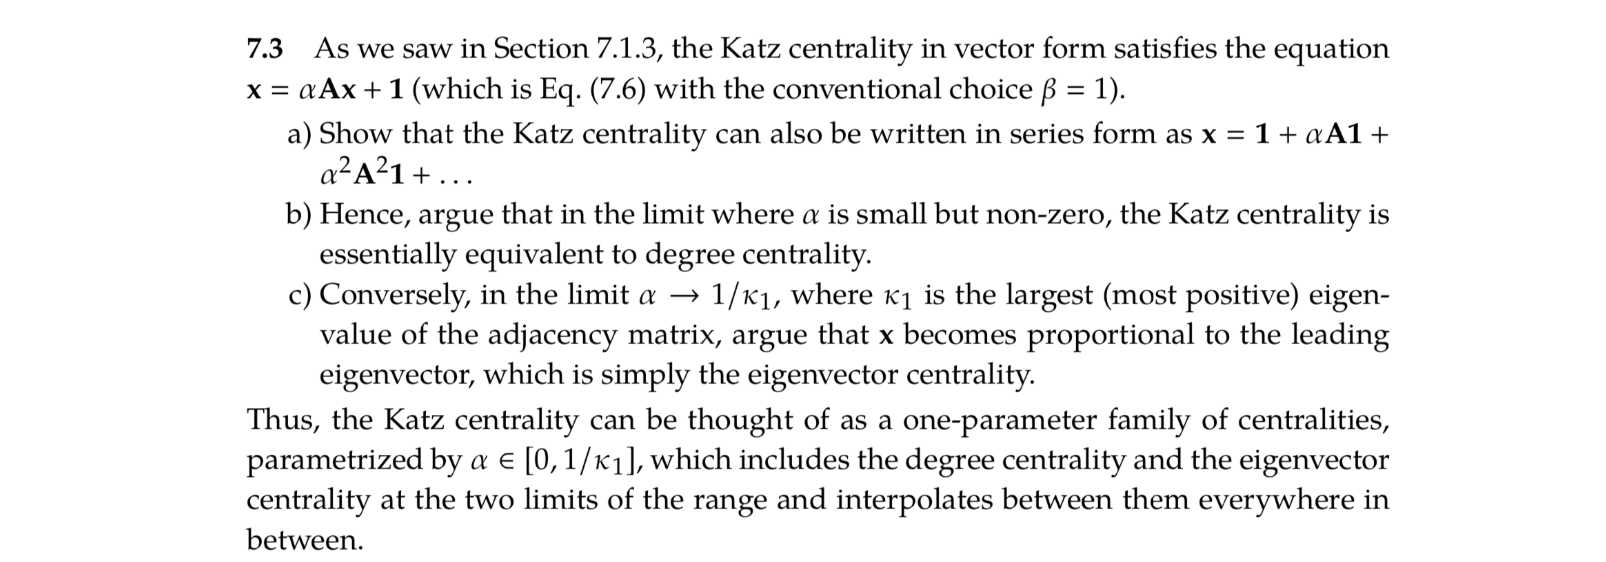

### (a)

#### Approach 1: interpretation with intermedite nodes

The k-th power of adjacency matrix A, i.e. can be calculated as $A^k$; element $(a_{ij})$ in $ A^k $ means that: node j is connected to node j via (k-1) intermediate nodes if $(a_{ij})=1$.

With any given k (the number of intermidiate nodes), the centrality of node i can be calculated as 
$\sum_{j=1}^n \alpha^k (A^k)_{ji} $

Summing up all possible number of intermidiate nodes, the Katz centrality becomes: 
$$
C(i) = \sum_{k=1}^{\infty} \sum_{j=1}^n \alpha^k (A^k)_{ji} 
$$

The vectorized form of centrality for all nodes can be represented as
$$
\vec{x} = \vec{1} + \alpha A \vec{1} + \alpha^2 A^2 \vec{1} + ...
$$

#### Approach 2: interpretation with Neumann Series expansion

This conclusion can also be proved using Neumann Series, i.e.
$$
(I-A)^{-1} = \lim_{k\to\infty} \sum_{i=0}^k A^i
$$
Replace A with $\alpha A$, and insert into the formula of Katz Centrality: 
$$
\vec{x} = (I - \alpha A)^{-1}\vec{1} = \lim_{k\to\infty} \sum_{i=0}^k (\alpha A)^i \vec{1}
= \vec{1} + \alpha A \vec{1} + \alpha^2 A^2 \vec{1} + ...
$$

### (b)

When $\alpha$ is small, the terms with high orders of $\alpha$ can be neglected. Thus the remaining terms in the Katz centrality:  
$$
\vec{x} = \vec{1} + \alpha A \vec{1} + \alpha^2 A^2 \vec{1} + ... 
\approx \vec{1} + \alpha A \vec{1}
$$

As each term in $A\vec{1}$ is excatly the degree of that node,
$
x_i \approx 1 + k_i
$ 
In other words, when $\alpha$ is very small, the Katz centrality becomes the degree centrality plus a "free" degree of 1.

### (c)

When $\alpha \rightarrow \frac{1}{k_1}$, where $k_1$ is the largest eigenvalue of the adjacency matrix, the Katz centrality becomes    
$$
\vec{x} = \frac{1}{k_1}A\vec{x} + \vec{1}
$$
The eigenvector centrality is:
$$
\vec{x} = \frac{1}{k_1}A\vec{x}
$$
The two only differ in a constant term, as Katz centrality has small non-zero values to nodes that are not in strongly connected components of size two or more or their out-components.

---
## Problem 4 (7.5 Newman)

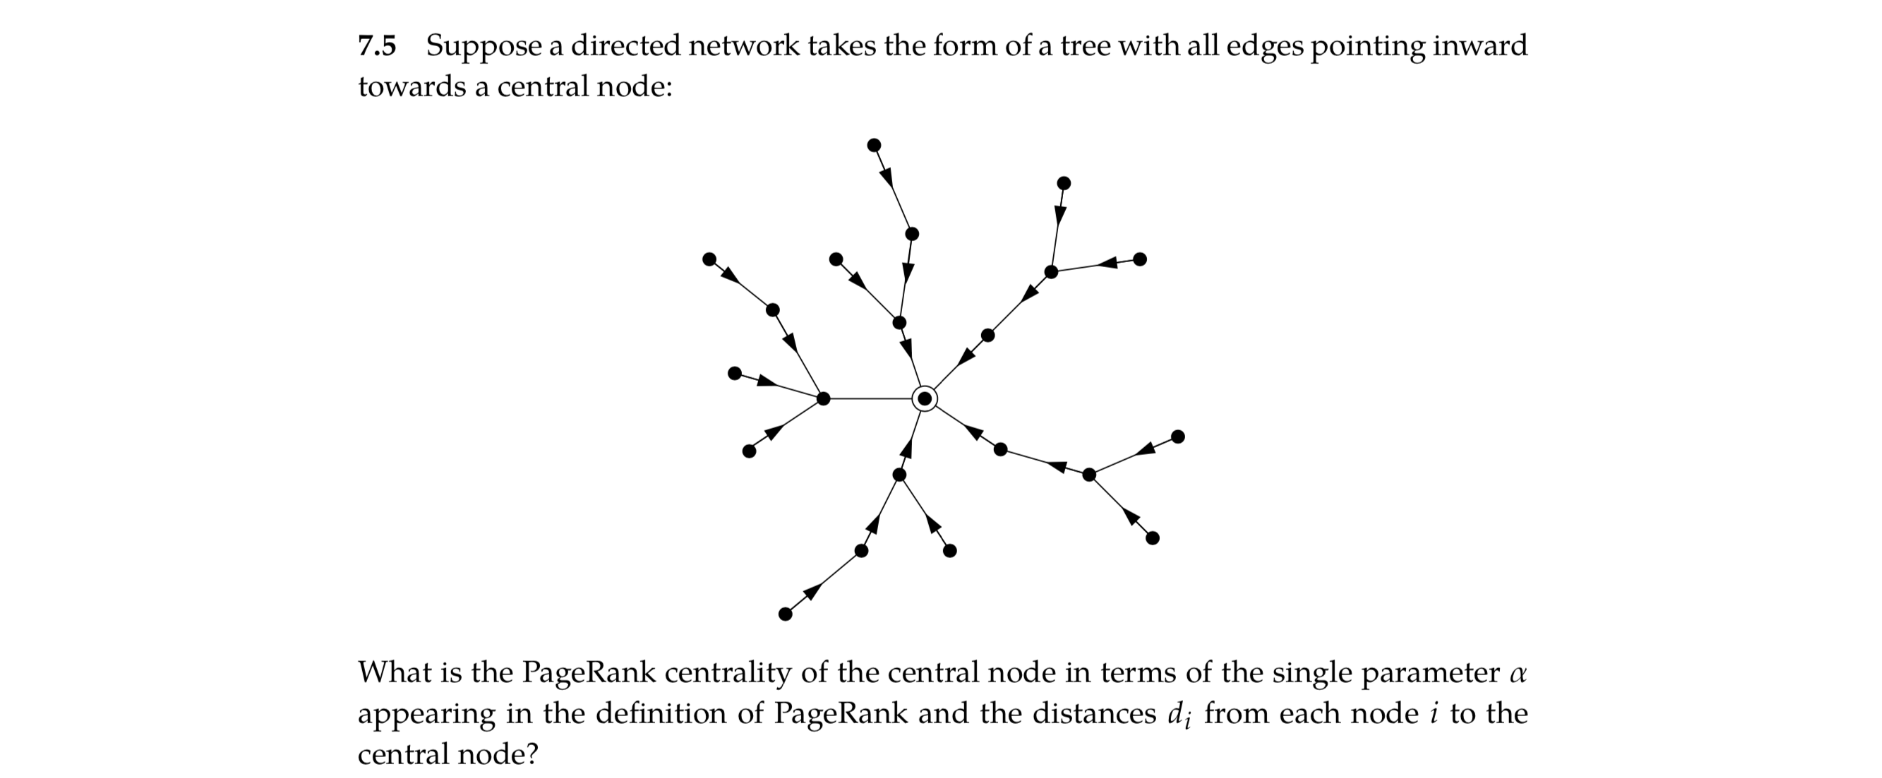

In this network, all nodes except for the central nodes have out degree excatly one. Also, set the trivial overall multiplier $\beta$ to 1, so that the PageRank centrality becomes:
$$
x_i = \alpha \sum_j A_{ij}\frac{x_j}{k_j^{out}} + \beta = \alpha \sum_j A_{ij}{x_j} + 1
$$

For any node i in the network, its contribution to the central node can be calculated as $ \alpha^{d_i} $, where $d_i$ is the distance between node i and the central node.    
Sum up all the nodes in the network, the PageRank centrality of the central node can be represented as: 
$\sum_i^n \alpha^{d_i}$

$$
x_c = \sum_{i=1}^c d_i \alpha^{d_i -1}
$$

---
## Problem 5

Download the citation data set from http://networksciencebook.com/translations/en/resources/data.html (see file citation.edgelist.txt). Use this data to:
- Build a node degree distribution, compute its parameters and and visualize it (in both power law and log-log forms)
- Compute the eigenvector, Katz and PageRank centralities for this network.

In [7]:
Graph_p5 = nx.read_edgelist('citation.edgelist.txt', create_using=nx.DiGraph()) # separate time-consuming step

**Get the in-degree distribution of the network**

In [8]:
p5 = Problem5()
p5.get_distribution()

**visualization of degreee distribution in a log-log plot**

<Figure size 432x288 with 0 Axes>

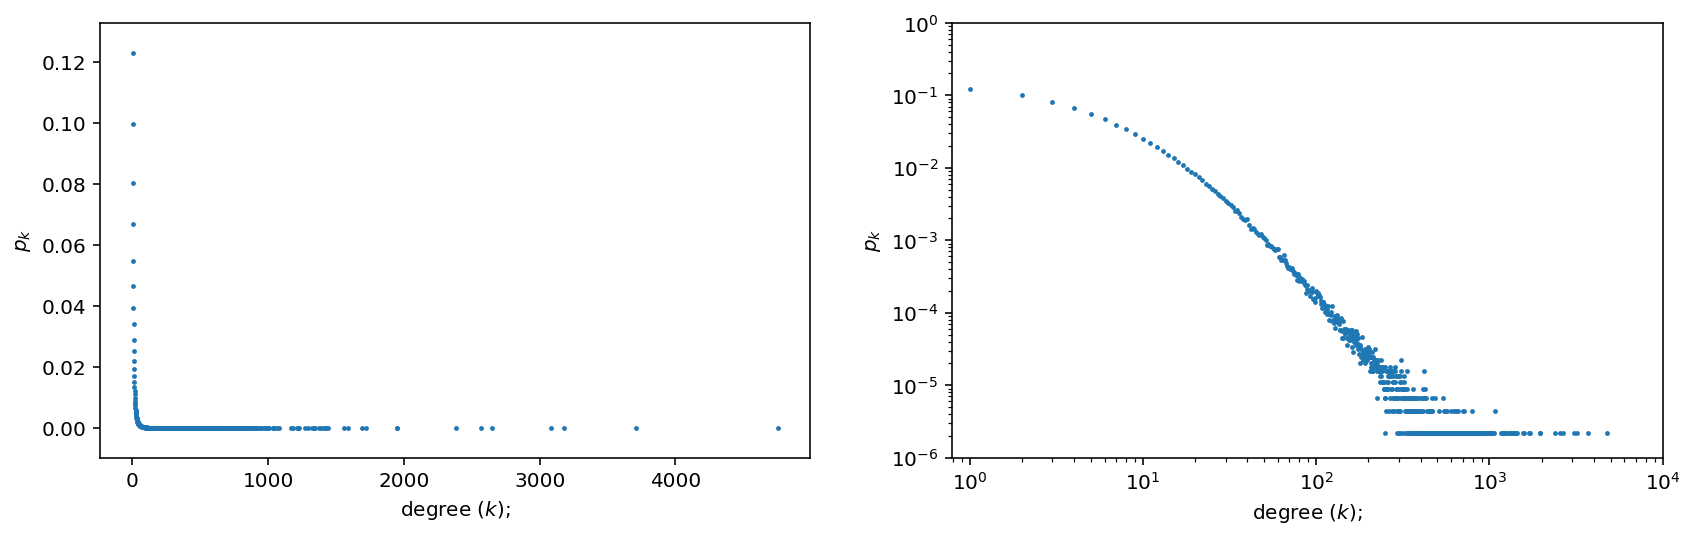

In [9]:
plt.figure()
fig, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].scatter(p5.k_values, p5.p_k, s=2)
ax[0].set_xlabel('degree ($k$);');
ax[0].set_ylabel('$p_k$');

ax[1].scatter(p5.k_values, p5.p_k, s=2)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(10**(-0.1), 10**4)
ax[1].set_ylim(10**(-6), 1)
ax[1].set_xlabel('degree ($k$);');
ax[1].set_ylabel('$p_k$');

**Compute the parameters of $\alpha$ and $c$**

In [10]:
alpha, c = p5.fit_params()

In [11]:
print('alpha: %.4f, c: %.4f' %(*alpha, *c))

alpha: -2.0594, c: 0.4385


**Plot the fitted linear model**

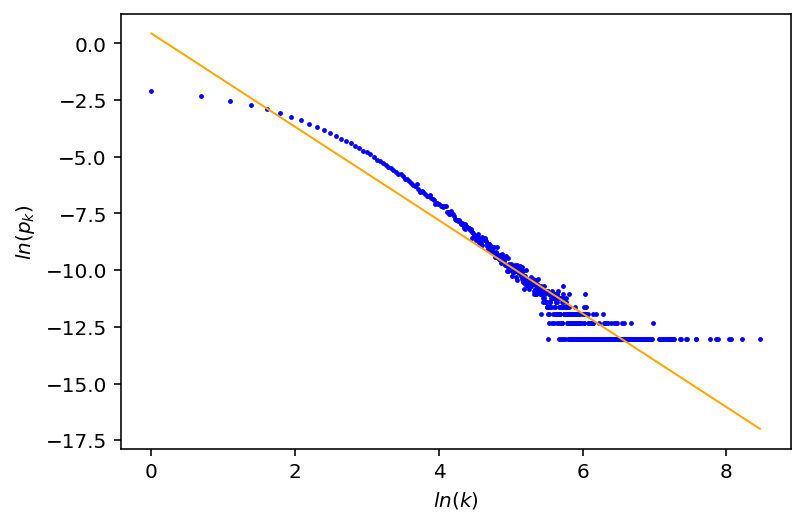

In [12]:
p5.plot_fitted()

***Compute the eigenvector centrality, Katz centrality, and PageRank centrality***

The adjacency matrix of this network is very large (450k by 450k) and sparse (>99% values are 0s), building such a matrix can be inefficient in memory and computation, e.g. taking the inverse of a matrix has time complexity $O(n^3)$ with Gaussian elimination method. Thus, it is better to use the module `networkx` to simplify the calculation of centralities. Precision of result are intentionally lowered to reduce time for computation.   
**As the number of nodes in the network is very large, only a small sample of nodes with their degree is printed.**

In [13]:
# eigenvector centrality
eigen_centrality = nx.eigenvector_centrality(Graph_p5, max_iter=30, tol=1e-05)

In [14]:
dict(list(eigen_centrality.items())[0:10])

{'0': 0.0003508885864203116,
 '61': 0.00029338050213553496,
 '33344': 0.014806084969211318,
 '33412': 0.006326586893205809,
 '36114': 0.001373335275580344,
 '37320': 0.007467465771898862,
 '37769': 0.0006901343801516719,
 '37924': 0.005343019840908224,
 '40658': 0.009844693021904867,
 '40762': 0.003542967272070917}

In [15]:
# Katz centrality
katz_centrality = nx.katz_centrality(Graph_p5, alpha=0.1, max_iter=50, tol=1e-04)

In [16]:
dict(list(katz_centrality.items())[0:10])

{'0': 0.0009586111424070759,
 '61': 0.0006869050792626532,
 '33344': 0.01730957576640893,
 '33412': 0.009509074469886162,
 '36114': 0.002232452364474283,
 '37320': 0.006191405681871072,
 '37769': 0.0012408031243916664,
 '37924': 0.004491864524178655,
 '40658': 0.010042104154623404,
 '40762': 0.0028988378079932474}

In [17]:
# PageRank centrality
pr = nx.pagerank(Graph_p5, alpha=0.85, max_iter=50, tol=1e-04)

In [18]:
dict(list(pr.items())[0:10])

{'0': 6.059924675424647e-06,
 '61': 2.656760693336473e-06,
 '33344': 8.22793183096133e-05,
 '33412': 6.148185273540096e-05,
 '36114': 2.7588774393879666e-05,
 '37320': 1.64968855982845e-05,
 '37769': 2.8105403101292195e-06,
 '37924': 1.036809996253348e-05,
 '40658': 0.00010814750102620587,
 '40762': 5.9615571173950655e-06}

In [19]:
katz_array = np.array(list(katz_centrality.values()))

In [20]:
eigen_array = np.array(list(eigen_centrality.values()))

In [21]:
pr_array = np.array(list(pr.values()))

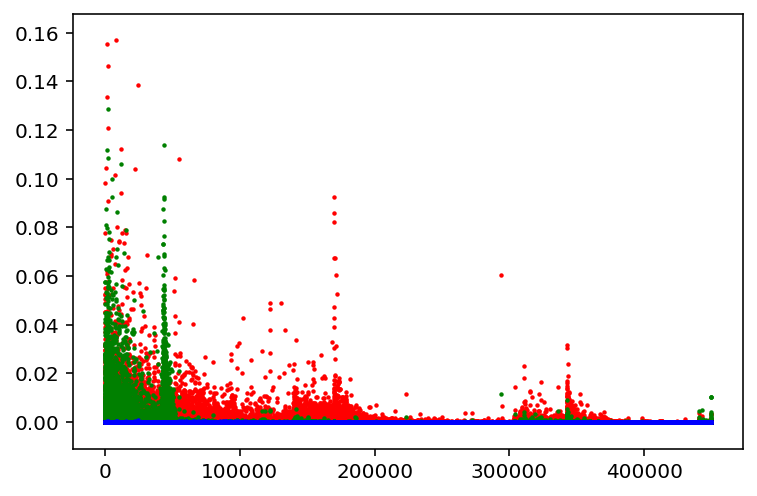

In [26]:
plt.figure();
plt.scatter(np.arange(0, len(katz_array)), katz_array, c='r', s=1.5);
plt.scatter(np.arange(0, len(eigen_centrality)), eigen_array, c='g', s=1.5);
plt.scatter(np.arange(0, len(pr)), pr_array, c='b', s=1.5);
plt.show()

## Problem 6

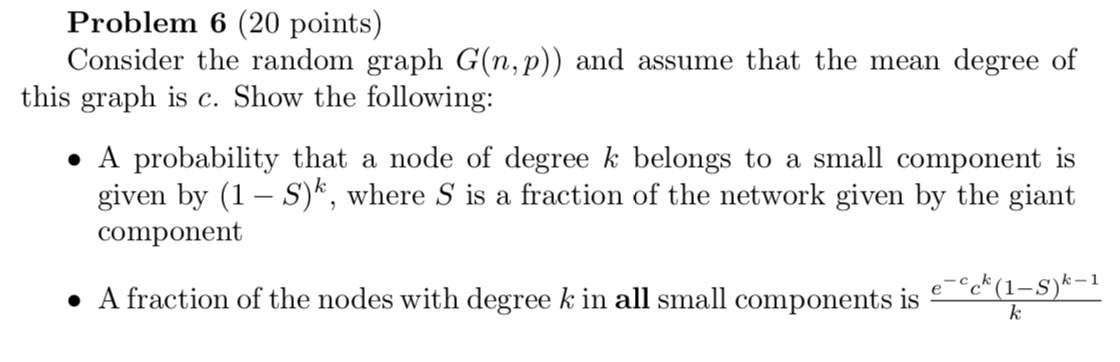

### (a)

For any arbitrary node, the probability of a specific neighbor node being part of the giant component is S;   
thus, the probability of this neighbor node belonging to a small component is (1-S).    
If all the neighbors of a node do not belong to the giant component, this node does not belong to the giant component either.    
Therefore, the node with degree k, i.e. with k neighbors, the probability that all its k neighbors belonging to a small component is $(1-S)^k$   
$q.e.d.$

### (b)

Let A donote the event "An arbitrary node has degree k",  
let B donote the event "An arbitrary node is in a small component",   
let C denote the event "An arbitrary node in a small component has degree k",  
then, $C = A|B$
$$
P(C) = P(A|B) = \frac{P(AB)}{P(B)} 
$$

From (a), we got the probability of event $B|A$, i.e. an arbitrary node with degree k is in a small component, thus     
$$
P(B|A) = (1-S)^k \\
$$

In the limit of very large n, $G(n, p)$ has a Poisson degree distribution.
$$
P(A) = \frac{e^{-c} c^k}{k!}
$$

$$
P(B) = 1-S
$$

Thus,
$$
P(C) = P(A|B) = \frac{P(AB)}{P(B)} = \frac{P(B|A) P(A)}{P(B)} 
= \frac{(1-S)^k}{1-S} \frac{e^{-c} c^k}{k!} = \frac{e^{-c} c^k (1-S)^{k-1}}{k!} \\
q.e.d
$$

---
The source code of this Jupyter Notebook will only be pushed to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_9293_Network_Science_and_Optimization) after the due date.